In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
from time import sleep
from IPython.display import clear_output 

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')#маски Хаара необходимо достать из библтотеки
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# img = cv2.imread('putan.jpg')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

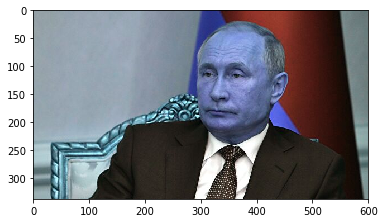

In [2]:
plt.imshow(img);

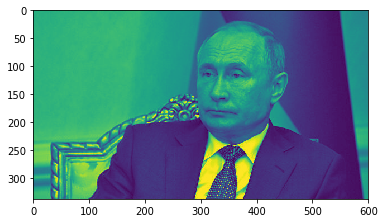

In [3]:
plt.imshow(gray);

In [4]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
plt.imsave("facccc.jpg", img)

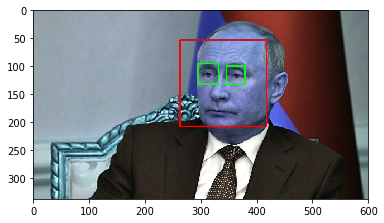

In [7]:
plt.imshow(plt.imread('facccc.jpg'));

https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html#face-detection

In [6]:
cap = cv2.VideoCapture(0)
ret, img = cap.read()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = img[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


Capture Video from Camera
===

In [4]:
cap = cv2.VideoCapture(0)

while(cap.isOpened()):
    ret, frame_rgb = cap.read()
    gray = cv2.cvtColor(frame_rgb, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        eyes = sorted(eyes, key=lambda x: x[1])[:2]
        for (xe, ye, we, he) in eyes:
            cv2.rectangle(frame_rgb, (x + xe, y + ye), (x + xe + we, y + ye + he), (0, 255, 0), 2)
            
    cv2.imshow('frame', frame_rgb)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


Playing Video from file
===

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture('vtest.avi')

while(cap.isOpened()):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Saving a Video
===

In [67]:
cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    frame = frame[::-1]
    if ret==True:
        frame = cv2.flip(frame,0)

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

detected in video
===

In [41]:
cap = cv2.VideoCapture(0)

while(cap.isOpened()):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = frame[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    
    
    
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html

dlib
===

In [5]:
import dlib
from scipy.spatial import distance

ModuleNotFoundError: No module named 'dlib'

https://www.adme.ru/tvorchestvo-fotografy/foto-na-pasporte-i-v-zhizni-1222610/

In [39]:
sp = dlib.shape_predictor('./dlib/shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('./dlib/dlib_face_recognition_resnet_model_v1.dat')
detector = dlib.get_frontal_face_detector()

In [60]:
img = plt.imread('Musk.jpg')
win = dlib.image_window()
win.clear_overlay()
win.set_image(img)

In [61]:
dets = detector(img, 1)

In [62]:
for k, d in enumerate(dets):
    shape = sp(img, d)
    win.clear_overlay()
    #win.add_overlay(d)
    win.add_overlay(shape)

In [64]:
face_descriptor = facerec.compute_face_descriptor(img, shape)

*этот дискриптор уникален для каждого человека, евклидово расстояния между фото лиц одного человека не превышает 0.6*

*даже есле на фото человек будет смотреть в не пряо в камеру- dlib сам преобразует фото с помощью афинных преобразований*